In [ ]:
# ML Project
# Submitted by:
# Yash Vijaynayaran Gupta - yxg210002

In [ ]:
# Importing the libraries
import numpy as np
from numpy import asarray
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [ ]:
dataset = pd.read_csv('https://personal.utdallas.edu/~rxr210009/pollution_us_2000_2016.csv', parse_dates=True, index_col='Date Local', sep =',')

In [ ]:
data = dataset.loc[dataset['City'] == "Phoenix"]

In [ ]:
data1 = data.filter(["NO2 Mean"], axis=1)
data2 = data.filter(["O3 Mean"], axis=1)
data3 = data.filter(["CO Mean"], axis=1)
data4 = data.filter(["SO2 Mean"], axis=1)

In [ ]:
data1=data1[~data1.index.duplicated(keep='first')]
print(data1.shape)
data2=data2[~data2.index.duplicated(keep='first')]
print(data2.shape)
data3=data3[~data3.index.duplicated(keep='first')]
print(data3.shape)
data4=data4[~data4.index.duplicated(keep='first')]
print(data4.shape)

(5755, 1)
(5755, 1)
(5755, 1)
(5755, 1)


In [ ]:
# selecting only 200 rows out of approx 5000 rows because we have to counter the computational power caveat and a few days are suffiecient enough to generate data
data1 = data1[4800:5000] 
data2 = data2[4800:5000]
data3 = data3[4800:5000]
data4 = data4[4800:5000]

In [ ]:
series_time_values1 = pd.DataFrame(data1['NO2 Mean']).reset_index()['NO2 Mean']
series_time_values2 = pd.DataFrame(data2['O3 Mean']).reset_index()['O3 Mean']
series_time_values3 = pd.DataFrame(data3['CO Mean']).reset_index()['CO Mean']
series_time_values4 = pd.DataFrame(data4['SO2 Mean']).reset_index()['SO2 Mean']

In [ ]:
final_series_values_NO2 = pd.Series(series_time_values1)
print("For NO2")
print(final_series_values_NO2)
final_series_values_O3 = pd.Series(series_time_values2)
print("For O3")
print(final_series_values_O3)
final_series_values_CO = pd.Series(series_time_values3)
print("For CO")
print(final_series_values_CO)
final_series_values_SO2 = pd.Series(series_time_values4)
print("For SO2")
print(final_series_values_SO2)

For NO2
0      22.375000
1      19.652174
2      11.708333
3      13.200000
4       8.250000
         ...    
195    27.291667
196    27.250000
197    30.681818
198    24.250000
199    29.458333
Name: NO2 Mean, Length: 200, dtype: float64
For O3
0      0.023833
1      0.034333
2      0.042458
3      0.041375
4      0.046250
         ...   
195    0.020292
196    0.019208
197    0.017042
198    0.020375
199    0.018167
Name: O3 Mean, Length: 200, dtype: float64
For CO
0      0.266667
1      0.247826
2      0.226087
3      0.262500
4      0.204167
         ...   
195    0.554167
196    0.575000
197    0.682609
198    0.587500
199    0.712500
Name: CO Mean, Length: 200, dtype: float64
For SO2
0      1.666667
1      1.565217
2      1.478261
3      1.416667
4      1.083333
         ...   
195    1.583333
196    1.041667
197    1.913043
198    1.458333
199    1.500000
Name: SO2 Mean, Length: 200, dtype: float64


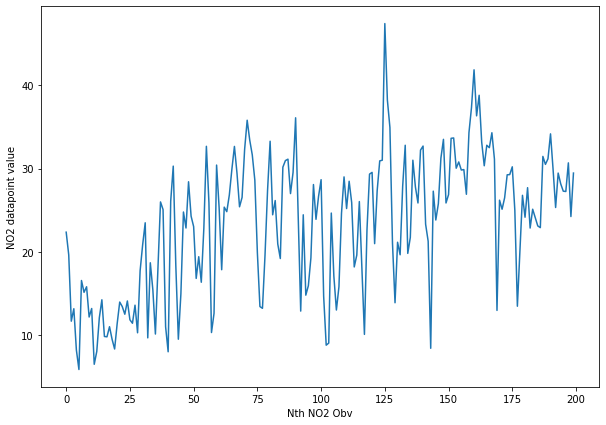

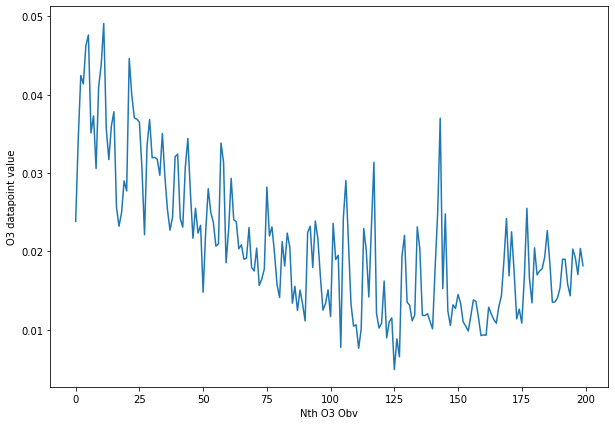

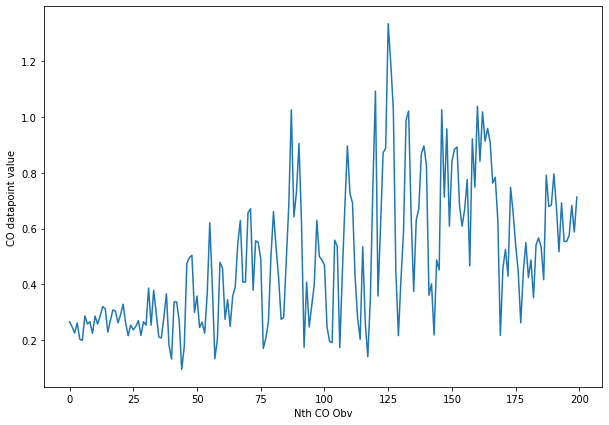

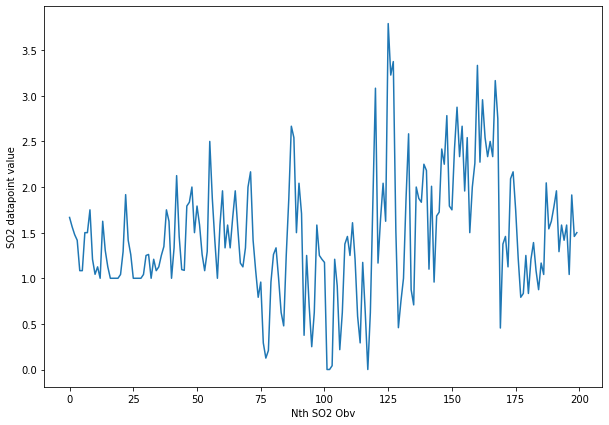

In [ ]:
# Dataset plot for all 4 pollutants - without normalization
plt.figure(figsize=(10, 7))
plt.plot(final_series_values_NO2)
plt.xlabel('Nth NO2 Obv')
plt.ylabel('NO2 datapoint value')
plt.show()
print("")
plt.figure(figsize=(10, 7))
plt.plot(final_series_values_O3)
plt.xlabel('Nth O3 Obv')
plt.ylabel('O3 datapoint value')
plt.show()
print("")
plt.figure(figsize=(10, 7))
plt.plot(final_series_values_CO)
plt.xlabel('Nth CO Obv')
plt.ylabel('CO datapoint value')
plt.show()
print("")
plt.figure(figsize=(10, 7))
plt.plot(final_series_values_SO2)
plt.xlabel('Nth SO2 Obv')
plt.ylabel('SO2 datapoint value')
plt.show()

In [ ]:
def normalization_method_minMax(datas):
    miniv = min(datas)
    maxiv = max(datas)
    range_val = maxiv - miniv
    scaled_data = []
    for val in datas:
        normized_val = (val-miniv)/range_val
        scaled_data.append(normized_val)
    return scaled_data
    

In [ ]:
normalized_NO2 = pd.Series(normalization_method_minMax(final_series_values_NO2))
print("For NO2")
print(normalized_NO2)
normalized_O3 = pd.Series(normalization_method_minMax(final_series_values_O3))
print("For O3")
print(normalized_O3)
normalized_CO = pd.Series(normalization_method_minMax(final_series_values_CO))
print("For CO")
print(normalized_CO)
normalized_SO2 = pd.Series(normalization_method_minMax(final_series_values_SO2))
print("For SO2")
print(normalized_SO2)

For NO2
0      0.396985
1      0.331309
2      0.139698
3      0.175678
4      0.056281
         ...   
195    0.515578
196    0.514573
197    0.597350
198    0.442211
199    0.567839
Length: 200, dtype: float64
For O3
0      0.428293
1      0.666033
2      0.849998
3      0.825477
4      0.935856
         ...   
195    0.348118
196    0.323575
197    0.274532
198    0.349998
199    0.300005
Length: 200, dtype: float64
For CO
0      0.138174
1      0.122951
2      0.105387
3      0.134807
4      0.087676
         ...   
195    0.370463
196    0.387295
197    0.474239
198    0.397395
199    0.498390
Length: 200, dtype: float64
For SO2
0      0.439560
1      0.412804
2      0.389871
3      0.373626
4      0.285714
         ...   
195    0.417582
196    0.274725
197    0.504539
198    0.384615
199    0.395604
Length: 200, dtype: float64


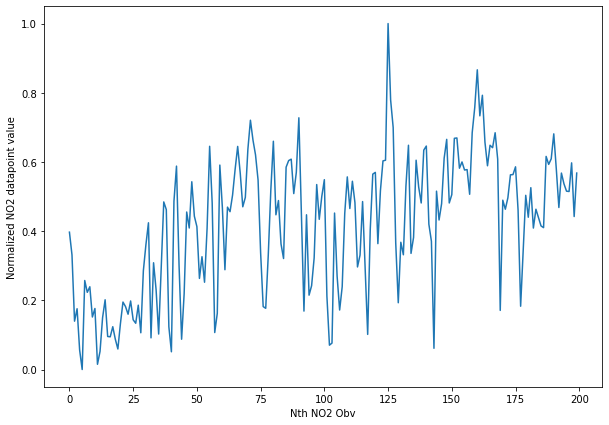

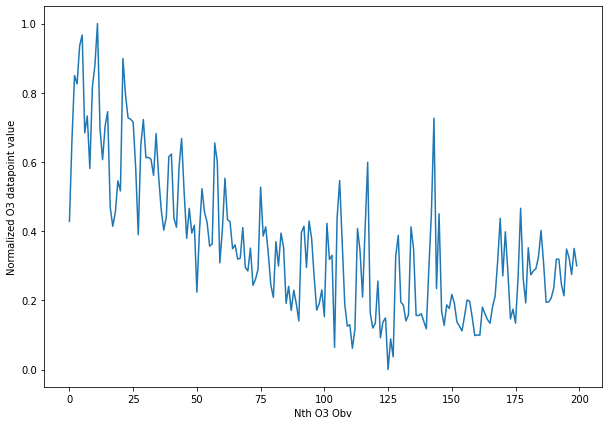

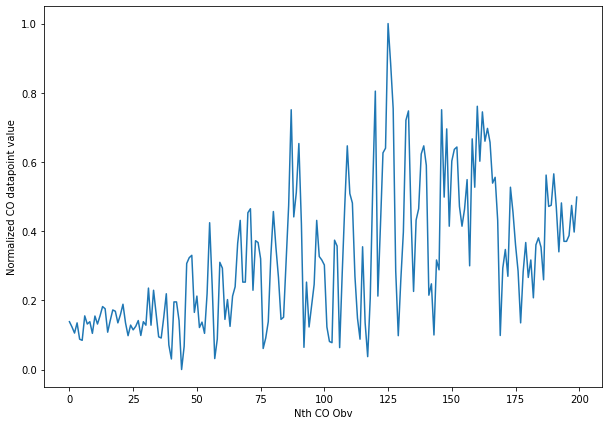

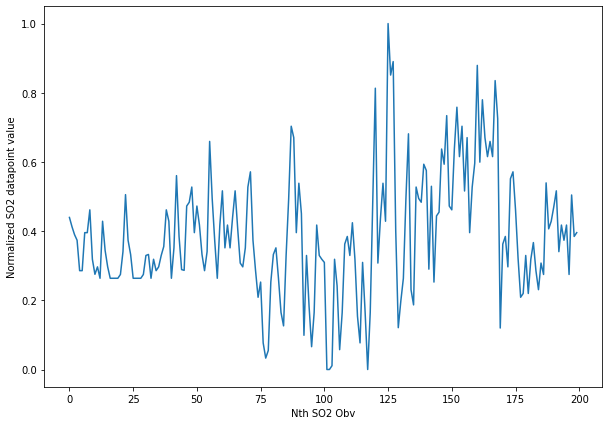

In [ ]:
# Dataset plot for all 4 pollutants - with normalization
plt.figure(figsize=(10, 7))
plt.plot(normalized_NO2)
plt.xlabel('Nth NO2 Obv')
plt.ylabel('Normalized NO2 datapoint value')
plt.show()
print("")
plt.figure(figsize=(10, 7))
plt.plot(normalized_O3)
plt.xlabel('Nth O3 Obv')
plt.ylabel('Normalized O3 datapoint value')
plt.show()
print("")
plt.figure(figsize=(10, 7))
plt.plot(normalized_CO)
plt.xlabel('Nth CO Obv')
plt.ylabel('Normalized CO datapoint value')
plt.show()
print("")
plt.figure(figsize=(10, 7))
plt.plot(normalized_SO2)
plt.xlabel('Nth SO2 Obv')
plt.ylabel('Normalized SO2 datapoint value')
plt.show()

In [ ]:
#Creating split in dataset for training and testing of model for all 4 pollutants

train_NO2_data, test_NO2_data = train_test_split(normalized_NO2, shuffle=False, test_size=0.20)
train_O3_data, test_O3_data = train_test_split(normalized_O3, shuffle=False, test_size=0.20)
train_CO_data, test_CO_data = train_test_split(normalized_CO, shuffle=False, test_size=0.20)
train_SO2_data, test_SO2_data = train_test_split(normalized_SO2, shuffle=False, test_size=0.20)

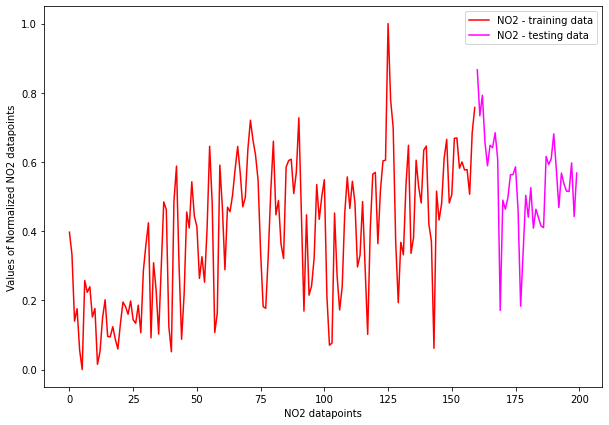

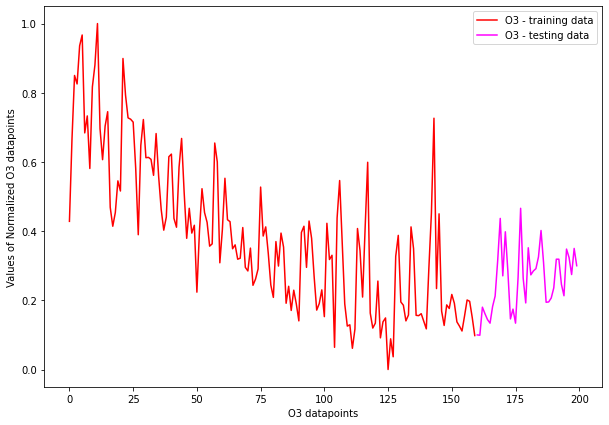

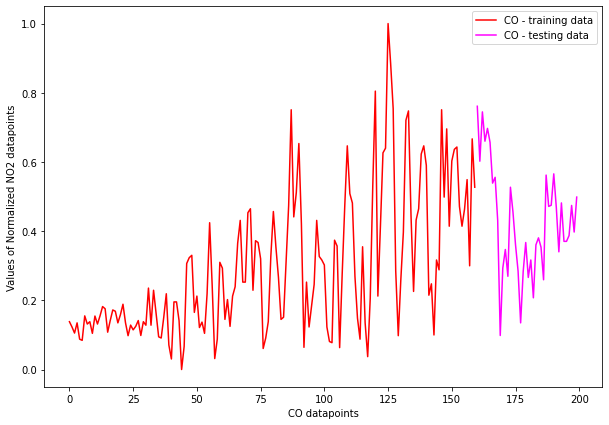

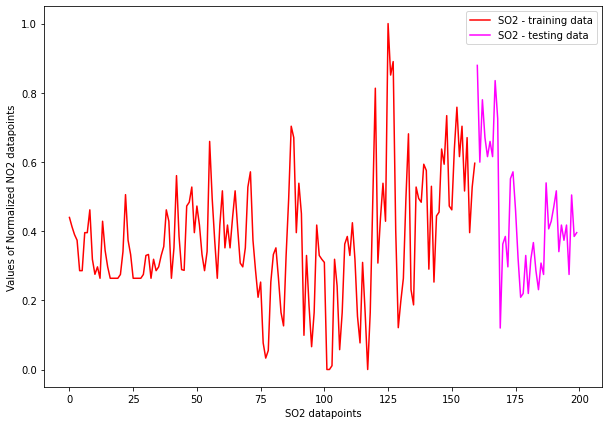

In [ ]:
# Plot of normalized training and testing datapoints that we use for LSTM in the following code
plt.figure(figsize=(10, 7))
plt.plot(train_NO2_data, label = 'NO2 - training data', color = 'red')
plt.plot(test_NO2_data, label = 'NO2 - testing data', color = 'magenta')
plt.xlabel('NO2 datapoints')
plt.ylabel('Values of Normalized NO2 datapoints')
plt.legend()
plt.show()
print("")
plt.figure(figsize=(10, 7))
plt.plot(train_O3_data, label = 'O3 - training data', color = 'red')
plt.plot(test_O3_data, label = 'O3 - testing data', color = 'magenta')
plt.xlabel('O3 datapoints')
plt.ylabel('Values of Normalized O3 datapoints')
plt.legend()
plt.show()
print("")
plt.figure(figsize=(10, 7))
plt.plot(train_CO_data, label = 'CO - training data', color = 'red')
plt.plot(test_CO_data, label = 'CO - testing data', color = 'magenta')
plt.xlabel('CO datapoints')
plt.ylabel('Values of Normalized NO2 datapoints')
plt.legend()
plt.show()
print("")
plt.figure(figsize=(10, 7))
plt.plot(train_SO2_data, label = 'SO2 - training data', color = 'red')
plt.plot(test_SO2_data, label = 'SO2 - testing data', color = 'magenta')
plt.xlabel('SO2 datapoints')
plt.ylabel('Values of Normalized NO2 datapoints')
plt.legend()
plt.show()

In [ ]:
class LSTM:
    
    # Initialization of LSTM variables.
    def __init__(self, inputs, outputs, hid_neu, lm_cls, alpha): 
      #lstm = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=n_inputs, alpha=0.1)
        
        ## Dimension of the Input Variable
        self.inputs = inputs 
        ## Dimension of Output Variable
        self.outputs = outputs
        ## Learning-Rate
        self.alpha = alpha
        ## Number of l.s.t.m cls
        self.lm_cls = lm_cls 
        ## Numner of neurons in the hidden layer
        self.hd_perceptrons = hid_neu
        
        #### Information for forget gSt
        ### Initialization of Forget gSt
        self.st_forget_gSt = [np.zeros((hd_perceptrons,1)) for i in range(lm_cls)]
        ## Initializing random wTs for Forget gSt
        self.wTs_forget = np.random.random((hd_perceptrons, inputs + hd_perceptrons))/np.sqrt(inputs + self.hd_perceptrons)
        ## Allocating random bias for Forget gSt        
        self.bias_fGt = np.random.random((hd_perceptrons, 1))

        #### Information for input gSt
        ## Initialization of input gSt
        self.st_input_gSt = [np.zeros((hd_perceptrons,1)) for i in range(lm_cls)]
        ## Allocating random bias for Input gSt
        self.bias_iGt = np.random.random((hd_perceptrons, 1))
        ### Initializing random wTs for Input gSt
        self.wTs_input = np.random.random((hd_perceptrons, inputs + hd_perceptrons))/np.sqrt(inputs + self.hd_perceptrons)


        #### Information for output gSt
        ## Initialization of output 
        self.st_output_gSt = [np.zeros((hd_perceptrons,1)) for i in range(lm_cls)]
        ## Allocating random bias for output gSt
        self.bias_oGt = np.random.random((hd_perceptrons, 1))
        ## Initializing random wTs for output gSt
        self.wTs_output = np.random.random((hd_perceptrons, inputs + hd_perceptrons))/np.sqrt(inputs + self.hd_perceptrons)
        
        #### Information for cls gSt
        ## Initialization cls gSt 
        self.st_cls_gSt = [np.zeros((hd_perceptrons,1)) for i in range(lm_cls)] 
        ## Allocating random bias for cls gSt
        self.bias_clsGt = np.random.random((hd_perceptrons, 1))
        ## Initializing random wTs for cls gSt
        self.wTs_cls = np.random.random((hd_perceptrons, inputs + hd_perceptrons))/np.sqrt(inputs + self.hd_perceptrons)
        

        #### Information for hidden gSt
        ## Initialization of hidden gSt 
        self.st_hidden_gSt = [np.zeros((hd_perceptrons,1)) for i in range(lm_cls)] 

        #### Information for candidate gSt
        ## Initialization of candidate gSt
        self.st_candidate_gSt = [np.zeros((hd_perceptrons,1)) for i in range(lm_cls)]

   
        # Final output wTs
        self.f_wTs = np.random.random((outputs, hd_perceptrons))
        # Final output bias
        self.f_bias= np.random.random((outputs, 1))

        ### Activation functions
    ## Sig func
    def sigmoid_function(self, x):
        sig = 1 / (1 + np.exp(-x))
        return sig

    # Derivative of sigmoid function
    def sigmoid_function_derivative(self, x):
        return self.sigmoid_function(x) * (1 - self.sigmoid_function(x))

    ## Tanh function
    def tanh_function(self, x):
        tnh = np.tanh(x)
        return tnh

    ### Derivative of tanh function
    def tanh_function_derivative(self, x):
        return (1-(x**2))
    
    
    # Forward Pass of LSTM
    def fw_pas(self, x):
        ## create ar for storinb x
        x = np.array(x)
        self.x = x
        for j in range(1, self.lm_cls):
            ##Updating Values in Forget gSt
            forget_layer = self.sigmoid_function(self.wTs_forget @ np.vstack((self.st_hidden_gSt[j-1], self.x[j])) + self.bias_fGt)
            ###Storing res val to use for the nxt iter.
            self.st_forget_gSt[j] = forget_layer

            ###Updating Values in Input gSt
            input_layer = self.sigmoid_function(self.wTs_input @ np.vstack((self.st_hidden_gSt[j-1], self.x[j])) + self.bias_iGt)
            ###Storing res val to use for the nxt iter.
            self.st_input_gSt[j] = input_layer

            ####Updating Values in Candidate gSt
            canditate_layer = self.tanh_function(self.wTs_cls @ np.vstack((self.st_hidden_gSt[j-1], self.x[j])) + self.bias_clsGt)
            ###Storing res val to use for the nxt iter.
            self.st_candidate_gSt[j] = canditate_layer

            ####Updating Values in cls gSt gSt
            cls_layer = forget_layer*self.st_cls_gSt[j-1] + input_layer*canditate_layer
            ###Storing res val to use for the nxt iter.
            self.st_cls_gSt[j] = cls_layer

            ###Updating Values in Output gSt
            output_layer = self.sigmoid_function(self.wTs_output @ np.vstack((self.st_hidden_gSt[j-1], self.x[j])) + self.bias_oGt)
            ###Storing res val to use for the nxt iter.
            self.st_output_gSt[j] = output_layer

            ###Updating Values in Hidden gSt
            hid_layer = output_layer*self.tanh_function(cls_layer) 
            ###Storing res val to use for the nxt iter.
            self.st_hidden_gSt[j] = hid_layer        
            
                    
        # Returning the predicted value of the output variable
        prd_y = self.f_wTs @ self.st_hidden_gSt[-1] + self.f_bias
        return prd_y
    
    # Backward Pass of LSTM
    def bw_pas(self, tr_y, prd_y):

        # Storing Deltas value for the Forget gSt
        del_forget_gst  = [np.zeros((self.hd_perceptrons,1)) for i in range(self.lm_cls+1)]
        #Arrays to store derivatives of forget gSt 
        del_wTs_forget_gSt = np.zeros_like(a = self.wTs_forget)
        #Arrays to store bias of forgt gSt  
        del_bias_forget_gSt = np.zeros_like(a = self.bias_fGt)


        # Storing Deltas value for the Input gSt
        del_input_gSt = [np.zeros((self.hd_perceptrons,1)) for i in range(self.lm_cls+1)]
        #Arrays to store derivatives  abd bias of input gSt  
        del_wTs_input_gSt = np.zeros_like(a = self.wTs_input)
        #Arrays to store bias of inpt gSt   
        del_bias_input_gSt = np.zeros_like(a = self.bias_iGt)

        # Storing Deltas value for the Candidate gSt
        del_canditate_gSt = [np.zeros((self.hd_perceptrons,1)) for i in range(self.lm_cls+1)]

        # Storing Deltas value for the cls gSt
        del_cls_gSt = [np.zeros((self.hd_perceptrons,1)) for i in range(self.lm_cls+1)]
        #Arrays to store derivatives of cls gSt  
        del_bias_cls_gSt = np.zeros_like(a = self.bias_clsGt) 
        #Arrays to store w0 of cls gSt      
        del_wTs_cls_gSt = np.zeros_like(a = self.wTs_cls)
        

        # Storing Deltas value for the Output gSt
        del_output_gSt = [np.zeros((self.hd_perceptrons,1)) for i in range(self.lm_cls+1)] 
        #Arrays to store derivatives of output gSt      
        del_wTs_output_gSt = np.zeros_like(a = self.wTs_output)
        #Arrays to store bias of output gSt   
        del_bias_output_gSt = np.zeros_like(a = self.bias_oGt)

        # Storing Deltas value for the Hidden gSt
        del_hidden_gSt = [np.zeros((self.hd_perceptrons,1)) for i in range(self.lm_cls+1)]
         
        
        #Arrays to store serivative of Final W0 
        del_wTs_final = np.zeros_like(a = self.f_wTs)
        #Arrays to store derivatives of final w0  
        del_bias_final = np.zeros_like(a = self.f_bias)  

        # Calculate the error
        del_evaluate = tr_y - prd_y
        # Computing the derivatives of final wTs 
        del_wTs_final = del_evaluate * self.st_hidden_gSt[-1].T
        # Computing the derivatives of final bias
        del_bias_final = del_evaluate 

        for t in reversed(range(self.lm_cls)):
          ## val z(z will be a vertical stack val)
            z = np.vstack((self.st_hidden_gSt[t-1], self.x[t]))

            # Calculating Gradient for Hidden gSt
            del_hidden_gSt[t] = self.f_wTs.T @ del_evaluate + del_hidden_gSt[t+1]

            # Calculating Gradient for Output gSt
            del_output_gSt[t] = self.tanh_function(self.st_cls_gSt[t]) * del_hidden_gSt[t] * self.sigmoid_function_derivative(self.st_hidden_gSt[t])
            ### Add all wTs values of op deltas
            del_wTs_output_gSt += del_output_gSt[t] @ z.T
            ### Add all w0 values of op  deltas
            del_bias_output_gSt += del_output_gSt[t]

            # Calculating Gradient for cls gSt
            del_cls_gSt[t] = self.st_output_gSt[t] * del_hidden_gSt[t] * self.tanh_function_derivative(self.st_cls_gSt[t]) + del_cls_gSt[t+1]

            # Calculating Gradient for fgt gSt
            del_forget_gst [t] = self.st_cls_gSt[t-1] * del_cls_gSt[t] * self.sigmoid_function_derivative(self.st_forget_gSt[t])
            ### Add all the wTs values of fogt  deltas
            del_wTs_forget_gSt += del_forget_gst [t] @ z.T
            ### Add all the w0 values of fogt  deltas
            del_bias_forget_gSt += del_forget_gst [t]


            # Calculating Gradient for input gSt
            del_input_gSt[t] = self.st_candidate_gSt[t] * del_cls_gSt[t] * self.sigmoid_function_derivative(self.st_input_gSt[t])
            ### Add all wTs values of inp  deltas
            del_wTs_input_gSt += del_input_gSt[t] @ z.T
            ### Add all w0 values of inp  deltas
            del_bias_input_gSt += del_input_gSt[t]


            # Calculating Gradient for cls gSt
            del_canditate_gSt[t] = self.st_input_gSt[t] * del_cls_gSt[t] * self.tanh_function_derivative(self.st_candidate_gSt[t])
            ### Add all the wTs of cls  deltas
            del_wTs_cls_gSt += del_cls_gSt[t] @ z.T
            ### Add the w0 values of cls  deltas
            del_bias_cls_gSt += del_cls_gSt[t]  
                            

        return del_wTs_final, del_bias_final, del_wTs_forget_gSt/self.lm_cls, del_bias_forget_gSt/self.lm_cls, del_wTs_input_gSt/self.lm_cls, del_bias_input_gSt/self.lm_cls, del_wTs_output_gSt/self.lm_cls, del_bias_output_gSt/self.lm_cls, del_wTs_cls_gSt/self.lm_cls, del_bias_cls_gSt/self.lm_cls
        
   # Training the Model        
    def modEL_FiT_func(self, epochs, x, tr_y, vaL_in_x=None, tr_yval=None):

        ### Lists for the val of train and validation loss 
        self.trainLo_Lt, self.valilLo_list = [], [] ### Lists 
        
        for k in range(epochs):
            ## Train: -loss per epoch
            trainLos = 0 
            ## valid: -loss per epoch          
            valiLos = 0         
            for i in range(len(x)):
            
                ### Calc: predicted/next y
                prd_y = self.fw_pas(x[i])

                ## BackwardLPass using the error
                del_wTs_final, del_bias_final, del_wTs_forget_gSt, del_bias_forget_gSt, del_wTs_input_gSt, del_bias_input_gSt, del_wTs_output_gSt, del_bias_output_gSt, del_wTs_cls_gSt, del_bias_cls_gSt = self.bw_pas(tr_y[i], prd_y)

                ###$ Update: the wTs gSts  of LSTM cls  
                self.wTs_forget = self.wTs_forget + self.alpha * del_wTs_forget_gSt
                self.wTs_input = self.wTs_input + self.alpha * del_wTs_input_gSt
                self.wTs_cls = self.wTs_cls + self.alpha * del_wTs_cls_gSt
                self.wTs_output = self.wTs_output + self.alpha * del_wTs_output_gSt

                ###Update: w0 LSTM cls
                self.bias_fGt = self.bias_fGt + self.alpha * del_bias_forget_gSt
                self.bias_iGt = self.bias_iGt + self.alpha * del_bias_input_gSt
                self.bias_clsGt = self.bias_clsGt + self.alpha * del_bias_cls_gSt 
                self.bias_oGt = self.bias_oGt + self.alpha * del_bias_output_gSt                
                
                ###@Update: final wTs L.S.T.M cls
                self.f_wTs = self.f_wTs + self.alpha * del_wTs_final
                self.f_bias = self.f_bias + self.alpha * del_bias_final 

                ### updat val of tarin loss
                trainLos += ((tr_y[i] - prd_y)**2)/2
            ### apped of tarin loss list
            self.trainLo_Lt.append(trainLos)

            # Checking: model is overfitting or not
            if vaL_in_x is not None and tr_yval is not None:
              ### calling the predict() function..
              predicted_yval = self.predict(vaL_in_x)
              ### applying... the reshape():(built-in lib ) on the predicted yval
              predicted_yval = predicted_yval.reshape((predicted_yval.shape[0], 1))
              ### applying... the reshape():(built-in lib ) on the train yval
              tr_yval = tr_yval.reshape((tr_yval.shape[0], 1))

              ### calcuting the validation los for every itesration
              valiLos = np.sum( (tr_yval - predicted_yval)**2 , axis =0)/2
              ##@ appending valiLos
              self.valilLo_list.append(valiLos)
            
            print("Epoch: {}/{} ===>>> Training loss: {}".format(str(k), epochs, trainLos))

        if vaL_in_x is not None and tr_yval is not None:
          
          return np.concatenate(self.trainLo_Lt), np.concatenate(self.valilLo_list)
    
    # A Function to predict mean concentration of pollutant for the following day
    def predict(self, x):   
      #Inialise a list name forecast_list..      
        forcast_list = []
        #let l be the len() of x(val)
        l = len(x)
        ##Looping through the forecast list untill the termination condition is reached while is len() of x(val).
        for i in range(l):
          ### Keep appedning the forecast list with he value of forwads pass functions vals
            forcast_list.append(self.fw_pas(x[i]))   
        ##@# finally return the concat() aval of forcasr list             
        return np.concatenate(forcast_list)

    


In [ ]:
# Input-Output split into list of sequential windows 
def splitting_win_for_input_output(inp, win, pr_idx):
        
        vals_of_WiNdow, vals_of_predicts = [], []
        for p in inp.index:
            # Find the ending index
            last_idx = p + win - 1 
            # Checking for idx out of bound error for t
            if last_idx + pr_idx > inp.index[-1]:
                break            
            # Splitting into train adn tst data 
            train_seQs, test_seQs = inp.loc[p:last_idx], inp[last_idx + pr_idx]
            vals_of_WiNdow.append(train_seQs)
            vals_of_predicts.append(test_seQs)
        return np.array(vals_of_WiNdow), np.array(vals_of_predicts)
        

In [ ]:
inp_vals_lstm = 10
out_vals_lstm = 1
hd_perceptrons = 15

In [ ]:
# Calculation of Root Mean Square Error
def calc_err_rmse(actual_real_vals_to_compare, pred_vals_to_compare):
  temp=mse(actual_real_vals_to_compare, pred_vals_to_compare)
  rmse_calc_metric=np.sqrt(temp)
  return rmse_calc_metric

In [ ]:
# Calculation of Mean Absolute Percentage Error
def calc_err_mape(actual_real_vals_to_compare, pred_vals_to_compare):
  mape_calc_metric_value=mape(actual_real_vals_to_compare, pred_vals_to_compare)
  return mape_calc_metric_value

In [ ]:
#NO2 modelling - split x,y
NO2_Xtrain, NO2_Ytrain = splitting_win_for_input_output(train_NO2_data, inp_vals_lstm, out_vals_lstm)
NO2_Xtest, NO2_Ytest = splitting_win_for_input_output(test_NO2_data, inp_vals_lstm, out_vals_lstm)

#Running for learning rate of 0.1
NO2_lstm1 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.1)
NO2_lstm1.modEL_FiT_func(epochs=350, x=NO2_Xtrain, tr_y=NO2_Ytrain)

NO2_lstm2 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.1)
NO2_lstm2.modEL_FiT_func(epochs=600, x=NO2_Xtrain, tr_y=NO2_Ytrain)

NO2_lstm3 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.1)
NO2_lstm3.modEL_FiT_func(epochs=900, x=NO2_Xtrain, tr_y=NO2_Ytrain)

NO2_lstm4 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.1)
NO2_lstm4.modEL_FiT_func(epochs=1100, x=NO2_Xtrain, tr_y=NO2_Ytrain)

#Running for learning rate of 0.01
NO2_lstm5 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.01)
NO2_lstm5.modEL_FiT_func(epochs=350, x=NO2_Xtrain, tr_y=NO2_Ytrain)

NO2_lstm6 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.01)
NO2_lstm6.modEL_FiT_func(epochs=600, x=NO2_Xtrain, tr_y=NO2_Ytrain)

NO2_lstm7 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.01)
NO2_lstm7.modEL_FiT_func(epochs=900, x=NO2_Xtrain, tr_y=NO2_Ytrain)

NO2_lstm8 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.01)
NO2_lstm8.modEL_FiT_func(epochs=1100, x=NO2_Xtrain, tr_y=NO2_Ytrain)

# NO2 Related log file attached in project files in results folder

Streaming output truncated to the last 5000 lines.
Epoch: 550/600 ===>>> Training loss: [[1.73242661]]
Epoch: 551/600 ===>>> Training loss: [[1.73273853]]
Epoch: 552/600 ===>>> Training loss: [[1.73305173]]
Epoch: 553/600 ===>>> Training loss: [[1.73336623]]
Epoch: 554/600 ===>>> Training loss: [[1.73368203]]
Epoch: 555/600 ===>>> Training loss: [[1.73399913]]
Epoch: 556/600 ===>>> Training loss: [[1.73431753]]
Epoch: 557/600 ===>>> Training loss: [[1.73463724]]
Epoch: 558/600 ===>>> Training loss: [[1.73495826]]
Epoch: 559/600 ===>>> Training loss: [[1.7352806]]
Epoch: 560/600 ===>>> Training loss: [[1.73560425]]
Epoch: 561/600 ===>>> Training loss: [[1.73592923]]
Epoch: 562/600 ===>>> Training loss: [[1.73625553]]
Epoch: 563/600 ===>>> Training loss: [[1.73658316]]
Epoch: 564/600 ===>>> Training loss: [[1.73691213]]
Epoch: 565/600 ===>>> Training loss: [[1.73724243]]
Epoch: 566/600 ===>>> Training loss: [[1.73757406]]
Epoch: 567/600 ===>>> Training loss: [[1.73790704]]
Epoch: 568/600

NO2 r.m.s.e. for lr=0.1 epoch=350 =>0.11090004592306157
NO2 r.m.s.e. for lr=0.1 epoch=600 =>0.10862264499908571
NO2 r.m.s.e. for lr=0.1 epoch=900 =>0.10977487969284254
NO2 r.m.s.e. for lr=0.1 epoch=1100 =>0.11267843493768738
NO2 r.m.s.e. for lr=0.01 epoch=350 =>0.1030277363916865
NO2 r.m.s.e. for lr=0.01 epoch=600 =>0.09559662499879805
NO2 r.m.s.e. for lr=0.01 epoch=900 =>0.09436375248028443
NO2 r.m.s.e. for lr=0.01 epoch=1100 =>0.0928562316940412
NO2 m.a.p.e. for lr=0.1 epoch=350 =>0.21889065128030535
NO2 m.a.p.e. for lr=0.1 epoch=600 =>0.21362403933574103
NO2 m.a.p.e. for lr=0.1 epoch=900 =>0.21474798740267034
NO2 m.a.p.e. for lr=0.1 epoch=1100 =>0.21916473515981522
NO2 m.a.p.e. for lr=0.01 epoch=350 =>0.19581828354326133
NO2 m.a.p.e. for lr=0.01 epoch=600 =>0.17912132883572945
NO2 m.a.p.e. for lr=0.01 epoch=900 =>0.18403498377462774
NO2 m.a.p.e. for lr=0.01 epoch=1100 =>0.17351002671797452


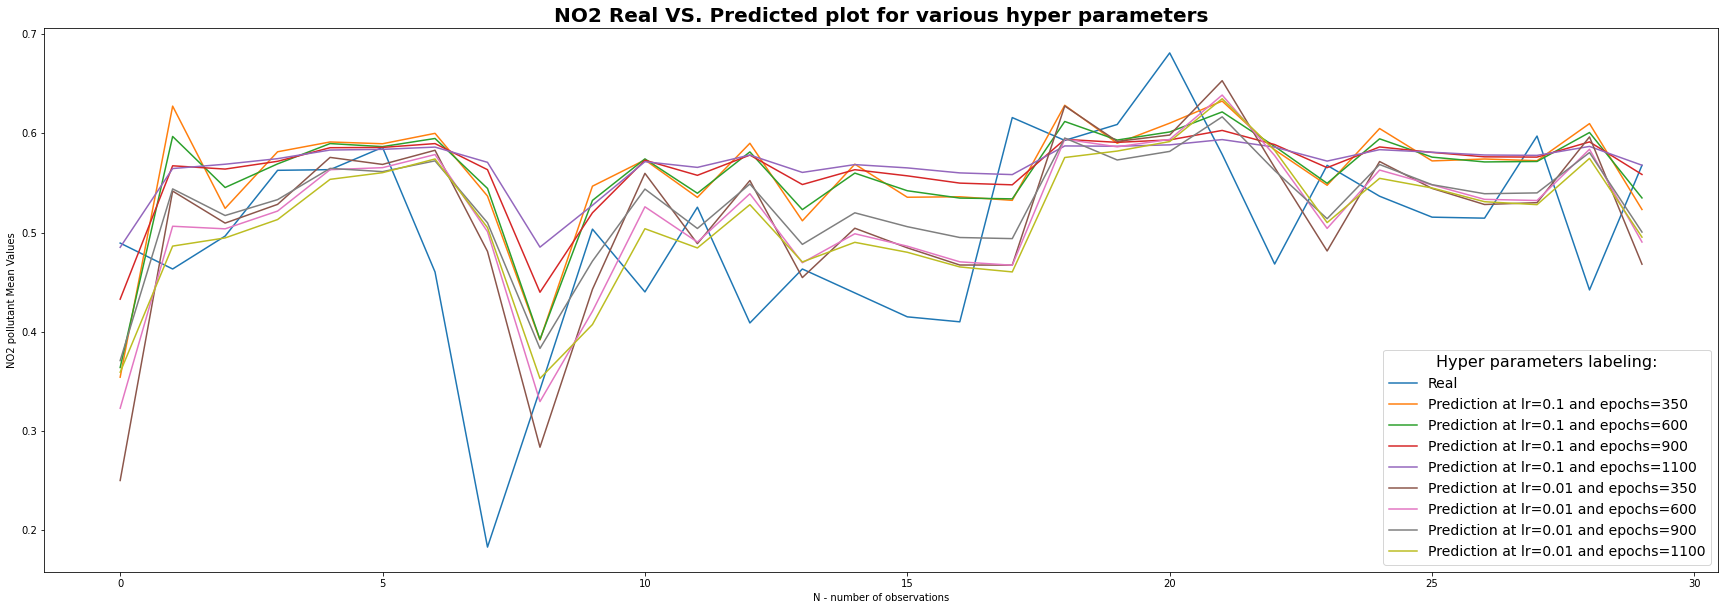

In [ ]:
# NO2 predictions for various combinations of hyperparams and their combined plots

NO2_Y_testPrediction1 = NO2_lstm1.predict(NO2_Xtest)
NO2_Y_testPrediction2 = NO2_lstm2.predict(NO2_Xtest)
NO2_Y_testPrediction3 = NO2_lstm3.predict(NO2_Xtest)
NO2_Y_testPrediction4 = NO2_lstm4.predict(NO2_Xtest)
NO2_Y_testPrediction5 = NO2_lstm5.predict(NO2_Xtest)
NO2_Y_testPrediction6 = NO2_lstm6.predict(NO2_Xtest)
NO2_Y_testPrediction7 = NO2_lstm7.predict(NO2_Xtest)
NO2_Y_testPrediction8 = NO2_lstm8.predict(NO2_Xtest)

print("NO2 r.m.s.e. for lr=0.1 epoch=350 =>" + str(calc_err_rmse(NO2_Ytest, NO2_Y_testPrediction1)))
print("NO2 r.m.s.e. for lr=0.1 epoch=600 =>" + str(calc_err_rmse(NO2_Ytest, NO2_Y_testPrediction2)))
print("NO2 r.m.s.e. for lr=0.1 epoch=900 =>" + str(calc_err_rmse(NO2_Ytest, NO2_Y_testPrediction3)))
print("NO2 r.m.s.e. for lr=0.1 epoch=1100 =>" + str(calc_err_rmse(NO2_Ytest, NO2_Y_testPrediction4)))
print("NO2 r.m.s.e. for lr=0.01 epoch=350 =>" + str(calc_err_rmse(NO2_Ytest, NO2_Y_testPrediction5)))
print("NO2 r.m.s.e. for lr=0.01 epoch=600 =>" + str(calc_err_rmse(NO2_Ytest, NO2_Y_testPrediction6)))
print("NO2 r.m.s.e. for lr=0.01 epoch=900 =>" + str(calc_err_rmse(NO2_Ytest, NO2_Y_testPrediction7)))
print("NO2 r.m.s.e. for lr=0.01 epoch=1100 =>" + str(calc_err_rmse(NO2_Ytest, NO2_Y_testPrediction8)))

print("NO2 m.a.p.e. for lr=0.1 epoch=350 =>" + str(calc_err_mape(NO2_Ytest, NO2_Y_testPrediction1)))
print("NO2 m.a.p.e. for lr=0.1 epoch=600 =>" + str(calc_err_mape(NO2_Ytest, NO2_Y_testPrediction2)))
print("NO2 m.a.p.e. for lr=0.1 epoch=900 =>" + str(calc_err_mape(NO2_Ytest, NO2_Y_testPrediction3)))
print("NO2 m.a.p.e. for lr=0.1 epoch=1100 =>" + str(calc_err_mape(NO2_Ytest, NO2_Y_testPrediction4)))
print("NO2 m.a.p.e. for lr=0.01 epoch=350 =>" + str(calc_err_mape(NO2_Ytest, NO2_Y_testPrediction5)))
print("NO2 m.a.p.e. for lr=0.01 epoch=600 =>" + str(calc_err_mape(NO2_Ytest, NO2_Y_testPrediction6)))
print("NO2 m.a.p.e. for lr=0.01 epoch=900 =>" + str(calc_err_mape(NO2_Ytest, NO2_Y_testPrediction7)))
print("NO2 m.a.p.e. for lr=0.01 epoch=1100 =>" + str(calc_err_mape(NO2_Ytest, NO2_Y_testPrediction8)))



plt.figure(figsize=(30, 10))
plt.plot(NO2_Ytest, label='Real')
plt.plot(NO2_Y_testPrediction1, label='Prediction at lr=0.1 and epochs=350')
plt.plot(NO2_Y_testPrediction2, label='Prediction at lr=0.1 and epochs=600')
plt.plot(NO2_Y_testPrediction3, label='Prediction at lr=0.1 and epochs=900')
plt.plot(NO2_Y_testPrediction4, label='Prediction at lr=0.1 and epochs=1100')
plt.plot(NO2_Y_testPrediction5, label='Prediction at lr=0.01 and epochs=350')
plt.plot(NO2_Y_testPrediction6, label='Prediction at lr=0.01 and epochs=600')
plt.plot(NO2_Y_testPrediction7, label='Prediction at lr=0.01 and epochs=900')
plt.plot(NO2_Y_testPrediction8, label='Prediction at lr=0.01 and epochs=1100')
plt.xlabel('N - number of observations')
plt.ylabel('NO2 pollutant Mean Values')
plt.title('NO2 Real VS. Predicted plot for various hyper parameters', fontweight='bold', size=20)
plt.legend(title="Hyper parameters labeling:", fontsize=14, title_fontsize=16)
plt.show()

In [ ]:
 #O3 modelling - split x,y
O3_Xtrain, O3_Ytrain = splitting_win_for_input_output(train_O3_data, inp_vals_lstm, out_vals_lstm)
O3_Xtest, O3_Ytest = splitting_win_for_input_output(test_O3_data, inp_vals_lstm, out_vals_lstm)

#Running for learning rate of 0.1
O3_lstm1 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.1)
O3_lstm1.modEL_FiT_func(epochs=350, x=O3_Xtrain, tr_y=O3_Ytrain)

O3_lstm2 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.1)
O3_lstm2.modEL_FiT_func(epochs=600, x=O3_Xtrain, tr_y=O3_Ytrain)

O3_lstm3 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.1)
O3_lstm3.modEL_FiT_func(epochs=900, x=O3_Xtrain, tr_y=O3_Ytrain)

O3_lstm4 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.1)
O3_lstm4.modEL_FiT_func(epochs=1100, x=O3_Xtrain, tr_y=O3_Ytrain)

#Running for learning rate of 0.01
O3_lstm5 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.01)
O3_lstm5.modEL_FiT_func(epochs=350, x=O3_Xtrain, tr_y=O3_Ytrain)

O3_lstm6 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.01)
O3_lstm6.modEL_FiT_func(epochs=600, x=O3_Xtrain, tr_y=O3_Ytrain)

O3_lstm7 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.01)
O3_lstm7.modEL_FiT_func(epochs=900, x=O3_Xtrain, tr_y=O3_Ytrain)

O3_lstm8 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.01)
O3_lstm8.modEL_FiT_func(epochs=1100, x=O3_Xtrain, tr_y=O3_Ytrain)

# O3 Related log file attached in project files in results folder


Streaming output truncated to the last 5000 lines.
Epoch: 550/600 ===>>> Training loss: [[1.39218492]]
Epoch: 551/600 ===>>> Training loss: [[1.39245393]]
Epoch: 552/600 ===>>> Training loss: [[1.39271999]]
Epoch: 553/600 ===>>> Training loss: [[1.39298267]]
Epoch: 554/600 ===>>> Training loss: [[1.39324257]]
Epoch: 555/600 ===>>> Training loss: [[1.39350067]]
Epoch: 556/600 ===>>> Training loss: [[1.39375788]]
Epoch: 557/600 ===>>> Training loss: [[1.39401492]]
Epoch: 558/600 ===>>> Training loss: [[1.39427228]]
Epoch: 559/600 ===>>> Training loss: [[1.39453031]]
Epoch: 560/600 ===>>> Training loss: [[1.39478931]]
Epoch: 561/600 ===>>> Training loss: [[1.39504955]]
Epoch: 562/600 ===>>> Training loss: [[1.39531102]]
Epoch: 563/600 ===>>> Training loss: [[1.39557262]]
Epoch: 564/600 ===>>> Training loss: [[1.39583216]]
Epoch: 565/600 ===>>> Training loss: [[1.39608878]]
Epoch: 566/600 ===>>> Training loss: [[1.39634449]]
Epoch: 567/600 ===>>> Training loss: [[1.39660134]]
Epoch: 568/60

O3 r.m.s.e. for lr=0.1 epoch=350 =>0.10305922213107684
O3 r.m.s.e. for lr=0.1 epoch=600 =>0.10939862098361373
O3 r.m.s.e. for lr=0.1 epoch=900 =>0.08976458086278731
O3 r.m.s.e. for lr=0.1 epoch=1100 =>0.09464140146352651
O3 r.m.s.e. for lr=0.01 epoch=350 =>0.10364529440913657
O3 r.m.s.e. for lr=0.01 epoch=600 =>0.09576063087466546
O3 r.m.s.e. for lr=0.01 epoch=900 =>0.08376827430845678
O3 r.m.s.e. for lr=0.01 epoch=1100 =>0.08870613043374535
O3 m.a.p.e. for lr=0.1 epoch=350 =>0.25984315379009293
O3 m.a.p.e. for lr=0.1 epoch=600 =>0.2861806729347848
O3 m.a.p.e. for lr=0.1 epoch=900 =>0.22954889988719987
O3 m.a.p.e. for lr=0.1 epoch=1100 =>0.2471532615773457
O3 m.a.p.e. for lr=0.01 epoch=350 =>0.2812438090607292
O3 m.a.p.e. for lr=0.01 epoch=600 =>0.25087789923069853
O3 m.a.p.e. for lr=0.01 epoch=900 =>0.22190585285064995
O3 m.a.p.e. for lr=0.01 epoch=1100 =>0.2521637979506653


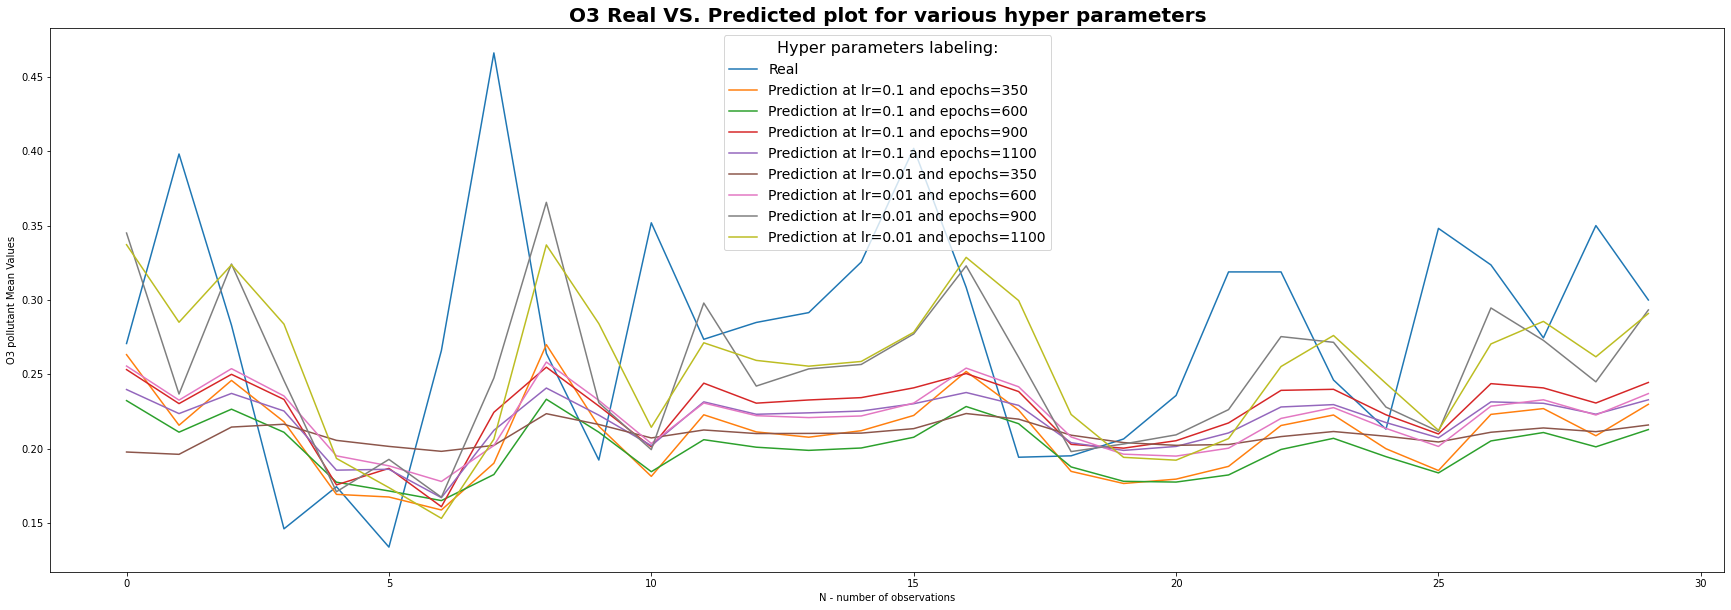

In [ ]:
# O3 predictions for various combinations of hyperparams and their combined plots

O3_Y_testPrediction1 = O3_lstm1.predict(O3_Xtest)
O3_Y_testPrediction2 = O3_lstm2.predict(O3_Xtest)
O3_Y_testPrediction3 = O3_lstm3.predict(O3_Xtest)
O3_Y_testPrediction4 = O3_lstm4.predict(O3_Xtest)
O3_Y_testPrediction5 = O3_lstm5.predict(O3_Xtest)
O3_Y_testPrediction6 = O3_lstm6.predict(O3_Xtest)
O3_Y_testPrediction7 = O3_lstm7.predict(O3_Xtest)
O3_Y_testPrediction8 = O3_lstm8.predict(O3_Xtest)

print("O3 r.m.s.e. for lr=0.1 epoch=350 =>" + str(calc_err_rmse(O3_Ytest, O3_Y_testPrediction1)))
print("O3 r.m.s.e. for lr=0.1 epoch=600 =>" + str(calc_err_rmse(O3_Ytest, O3_Y_testPrediction2)))
print("O3 r.m.s.e. for lr=0.1 epoch=900 =>" + str(calc_err_rmse(O3_Ytest, O3_Y_testPrediction3)))
print("O3 r.m.s.e. for lr=0.1 epoch=1100 =>" + str(calc_err_rmse(O3_Ytest, O3_Y_testPrediction4)))
print("O3 r.m.s.e. for lr=0.01 epoch=350 =>" + str(calc_err_rmse(O3_Ytest, O3_Y_testPrediction5)))
print("O3 r.m.s.e. for lr=0.01 epoch=600 =>" + str(calc_err_rmse(O3_Ytest, O3_Y_testPrediction6)))
print("O3 r.m.s.e. for lr=0.01 epoch=900 =>" + str(calc_err_rmse(O3_Ytest, O3_Y_testPrediction7)))
print("O3 r.m.s.e. for lr=0.01 epoch=1100 =>" + str(calc_err_rmse(O3_Ytest, O3_Y_testPrediction8)))

print("O3 m.a.p.e. for lr=0.1 epoch=350 =>" + str(calc_err_mape(O3_Ytest, O3_Y_testPrediction1)))
print("O3 m.a.p.e. for lr=0.1 epoch=600 =>" + str(calc_err_mape(O3_Ytest, O3_Y_testPrediction2)))
print("O3 m.a.p.e. for lr=0.1 epoch=900 =>" + str(calc_err_mape(O3_Ytest, O3_Y_testPrediction3)))
print("O3 m.a.p.e. for lr=0.1 epoch=1100 =>" + str(calc_err_mape(O3_Ytest, O3_Y_testPrediction4)))
print("O3 m.a.p.e. for lr=0.01 epoch=350 =>" + str(calc_err_mape(O3_Ytest, O3_Y_testPrediction5)))
print("O3 m.a.p.e. for lr=0.01 epoch=600 =>" + str(calc_err_mape(O3_Ytest, O3_Y_testPrediction6)))
print("O3 m.a.p.e. for lr=0.01 epoch=900 =>" + str(calc_err_mape(O3_Ytest, O3_Y_testPrediction7)))
print("O3 m.a.p.e. for lr=0.01 epoch=1100 =>" + str(calc_err_mape(O3_Ytest, O3_Y_testPrediction8)))



plt.figure(figsize=(30, 10))
plt.plot(O3_Ytest, label='Real')
plt.plot(O3_Y_testPrediction1, label='Prediction at lr=0.1 and epochs=350')
plt.plot(O3_Y_testPrediction2, label='Prediction at lr=0.1 and epochs=600')
plt.plot(O3_Y_testPrediction3, label='Prediction at lr=0.1 and epochs=900')
plt.plot(O3_Y_testPrediction4, label='Prediction at lr=0.1 and epochs=1100')
plt.plot(O3_Y_testPrediction5, label='Prediction at lr=0.01 and epochs=350')
plt.plot(O3_Y_testPrediction6, label='Prediction at lr=0.01 and epochs=600')
plt.plot(O3_Y_testPrediction7, label='Prediction at lr=0.01 and epochs=900')
plt.plot(O3_Y_testPrediction8, label='Prediction at lr=0.01 and epochs=1100')
plt.xlabel('N - number of observations')
plt.ylabel('O3 pollutant Mean Values')
plt.title('O3 Real VS. Predicted plot for various hyper parameters', fontweight='bold', size=20)
plt.legend(title="Hyper parameters labeling:", fontsize=14, title_fontsize=16)
plt.show()

In [ ]:
#CO modelling - split x,y
CO_Xtrain, CO_Ytrain = splitting_win_for_input_output(train_CO_data, inp_vals_lstm, out_vals_lstm)
CO_Xtest, CO_Ytest = splitting_win_for_input_output(test_CO_data, inp_vals_lstm, out_vals_lstm)

#Running for learning rate of 0.1
CO_lstm1 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.1)
CO_lstm1.modEL_FiT_func(epochs=350, x=CO_Xtrain, tr_y=CO_Ytrain)

CO_lstm2 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.1)
CO_lstm2.modEL_FiT_func(epochs=600, x=CO_Xtrain, tr_y=CO_Ytrain)

CO_lstm3 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.1)
CO_lstm3.modEL_FiT_func(epochs=900, x=CO_Xtrain, tr_y=CO_Ytrain)

CO_lstm4 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.1)
CO_lstm4.modEL_FiT_func(epochs=1100, x=CO_Xtrain, tr_y=CO_Ytrain)

#Running for learning rate of 0.01
CO_lstm5 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.01)
CO_lstm5.modEL_FiT_func(epochs=350, x=CO_Xtrain, tr_y=CO_Ytrain)

CO_lstm6 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.01)
CO_lstm6.modEL_FiT_func(epochs=600, x=CO_Xtrain, tr_y=CO_Ytrain)

CO_lstm7 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.01)
CO_lstm7.modEL_FiT_func(epochs=900, x=CO_Xtrain, tr_y=CO_Ytrain)

CO_lstm8 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.01)
CO_lstm8.modEL_FiT_func(epochs=1100, x=CO_Xtrain, tr_y=CO_Ytrain)

# CO Related log file attached in project files in results folder


Streaming output truncated to the last 5000 lines.
Epoch: 550/600 ===>>> Training loss: [[2.37794019]]
Epoch: 551/600 ===>>> Training loss: [[2.37713635]]
Epoch: 552/600 ===>>> Training loss: [[2.37632608]]
Epoch: 553/600 ===>>> Training loss: [[2.37550946]]
Epoch: 554/600 ===>>> Training loss: [[2.37468658]]
Epoch: 555/600 ===>>> Training loss: [[2.37385754]]
Epoch: 556/600 ===>>> Training loss: [[2.37302241]]
Epoch: 557/600 ===>>> Training loss: [[2.37218131]]
Epoch: 558/600 ===>>> Training loss: [[2.37133434]]
Epoch: 559/600 ===>>> Training loss: [[2.37048159]]
Epoch: 560/600 ===>>> Training loss: [[2.36962318]]
Epoch: 561/600 ===>>> Training loss: [[2.36875922]]
Epoch: 562/600 ===>>> Training loss: [[2.36788982]]
Epoch: 563/600 ===>>> Training loss: [[2.3670151]]
Epoch: 564/600 ===>>> Training loss: [[2.36613518]]
Epoch: 565/600 ===>>> Training loss: [[2.36525017]]
Epoch: 566/600 ===>>> Training loss: [[2.36436022]]
Epoch: 567/600 ===>>> Training loss: [[2.36346544]]
Epoch: 568/600

CO r.m.s.e. for lr=0.1 epoch=350 =>0.16309167327318796
CO r.m.s.e. for lr=0.1 epoch=600 =>0.15605876241516406
CO r.m.s.e. for lr=0.1 epoch=900 =>0.16170879563572635
CO r.m.s.e. for lr=0.1 epoch=1100 =>0.1572370196955375
CO r.m.s.e. for lr=0.01 epoch=350 =>0.11406066947836105
CO r.m.s.e. for lr=0.01 epoch=600 =>0.10382599464379498
CO r.m.s.e. for lr=0.01 epoch=900 =>0.10405700599143684
CO r.m.s.e. for lr=0.01 epoch=1100 =>0.10843307410430446
CO m.a.p.e. for lr=0.1 epoch=350 =>0.4858644688503915
CO m.a.p.e. for lr=0.1 epoch=600 =>0.4653615698888617
CO m.a.p.e. for lr=0.1 epoch=900 =>0.48166870366268594
CO m.a.p.e. for lr=0.1 epoch=1100 =>0.46889807570222836
CO m.a.p.e. for lr=0.01 epoch=350 =>0.32008046295379783
CO m.a.p.e. for lr=0.01 epoch=600 =>0.27573323333945887
CO m.a.p.e. for lr=0.01 epoch=900 =>0.27753138942116645
CO m.a.p.e. for lr=0.01 epoch=1100 =>0.29454584520129307


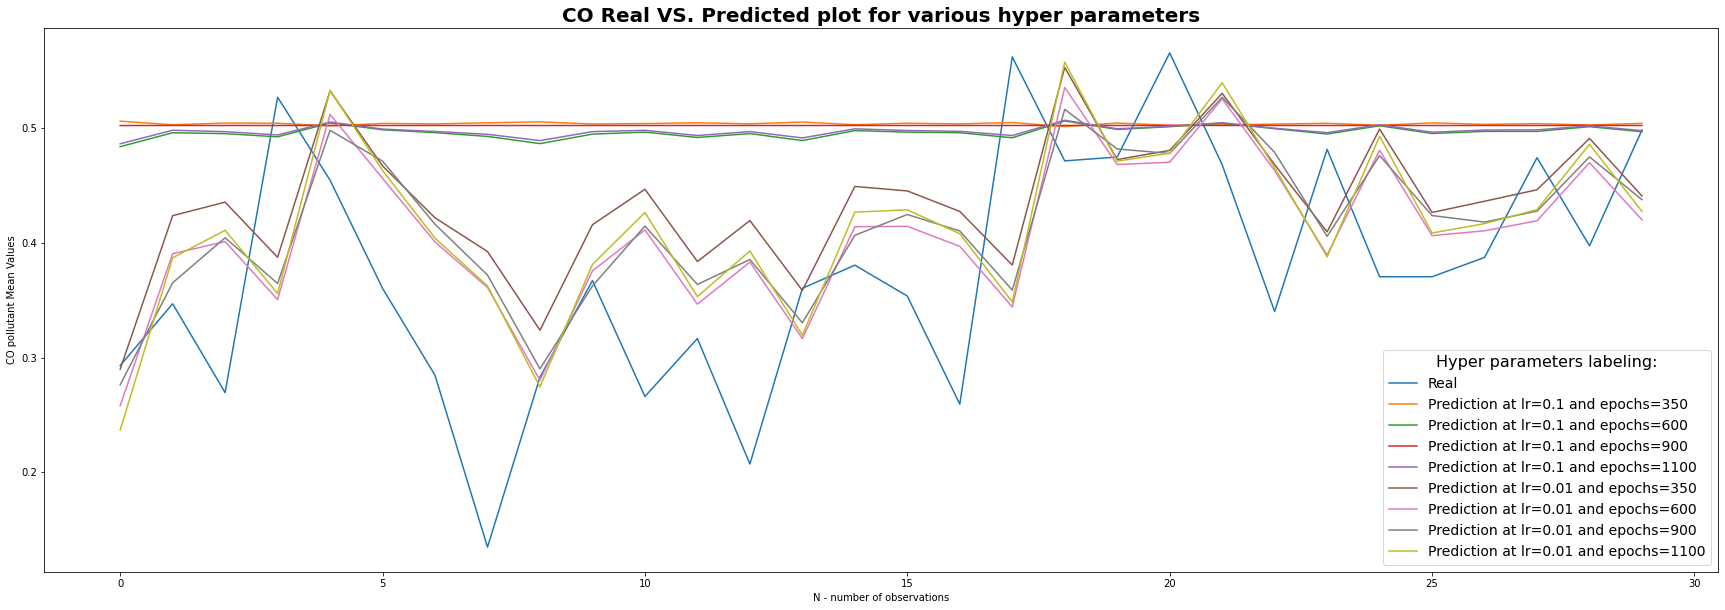

In [ ]:
# CO predictions for various combinations of hyperparams and their combined plots

CO_Y_testPrediction1 = CO_lstm1.predict(CO_Xtest)
CO_Y_testPrediction2 = CO_lstm2.predict(CO_Xtest)
CO_Y_testPrediction3 = CO_lstm3.predict(CO_Xtest)
CO_Y_testPrediction4 = CO_lstm4.predict(CO_Xtest)
CO_Y_testPrediction5 = CO_lstm5.predict(CO_Xtest)
CO_Y_testPrediction6 = CO_lstm6.predict(CO_Xtest)
CO_Y_testPrediction7 = CO_lstm7.predict(CO_Xtest)
CO_Y_testPrediction8 = CO_lstm8.predict(CO_Xtest)

print("CO r.m.s.e. for lr=0.1 epoch=350 =>" + str(calc_err_rmse(CO_Ytest, CO_Y_testPrediction1)))
print("CO r.m.s.e. for lr=0.1 epoch=600 =>" + str(calc_err_rmse(CO_Ytest, CO_Y_testPrediction2)))
print("CO r.m.s.e. for lr=0.1 epoch=900 =>" + str(calc_err_rmse(CO_Ytest, CO_Y_testPrediction3)))
print("CO r.m.s.e. for lr=0.1 epoch=1100 =>" + str(calc_err_rmse(CO_Ytest, CO_Y_testPrediction4)))
print("CO r.m.s.e. for lr=0.01 epoch=350 =>" + str(calc_err_rmse(CO_Ytest, CO_Y_testPrediction5)))
print("CO r.m.s.e. for lr=0.01 epoch=600 =>" + str(calc_err_rmse(CO_Ytest, CO_Y_testPrediction6)))
print("CO r.m.s.e. for lr=0.01 epoch=900 =>" + str(calc_err_rmse(CO_Ytest, CO_Y_testPrediction7)))
print("CO r.m.s.e. for lr=0.01 epoch=1100 =>" + str(calc_err_rmse(CO_Ytest, CO_Y_testPrediction8)))

print("CO m.a.p.e. for lr=0.1 epoch=350 =>" + str(calc_err_mape(CO_Ytest, CO_Y_testPrediction1)))
print("CO m.a.p.e. for lr=0.1 epoch=600 =>" + str(calc_err_mape(CO_Ytest, CO_Y_testPrediction2)))
print("CO m.a.p.e. for lr=0.1 epoch=900 =>" + str(calc_err_mape(CO_Ytest, CO_Y_testPrediction3)))
print("CO m.a.p.e. for lr=0.1 epoch=1100 =>" + str(calc_err_mape(CO_Ytest, CO_Y_testPrediction4)))
print("CO m.a.p.e. for lr=0.01 epoch=350 =>" + str(calc_err_mape(CO_Ytest, CO_Y_testPrediction5)))
print("CO m.a.p.e. for lr=0.01 epoch=600 =>" + str(calc_err_mape(CO_Ytest, CO_Y_testPrediction6)))
print("CO m.a.p.e. for lr=0.01 epoch=900 =>" + str(calc_err_mape(CO_Ytest, CO_Y_testPrediction7)))
print("CO m.a.p.e. for lr=0.01 epoch=1100 =>" + str(calc_err_mape(CO_Ytest, CO_Y_testPrediction8)))



plt.figure(figsize=(30, 10))
plt.plot(CO_Ytest, label='Real')
plt.plot(CO_Y_testPrediction1, label='Prediction at lr=0.1 and epochs=350')
plt.plot(CO_Y_testPrediction2, label='Prediction at lr=0.1 and epochs=600')
plt.plot(CO_Y_testPrediction3, label='Prediction at lr=0.1 and epochs=900')
plt.plot(CO_Y_testPrediction4, label='Prediction at lr=0.1 and epochs=1100')
plt.plot(CO_Y_testPrediction5, label='Prediction at lr=0.01 and epochs=350')
plt.plot(CO_Y_testPrediction6, label='Prediction at lr=0.01 and epochs=600')
plt.plot(CO_Y_testPrediction7, label='Prediction at lr=0.01 and epochs=900')
plt.plot(CO_Y_testPrediction8, label='Prediction at lr=0.01 and epochs=1100')
plt.xlabel('N - number of observations')
plt.ylabel('CO pollutant Mean Values')
plt.title('CO Real VS. Predicted plot for various hyper parameters', fontweight='bold', size=20)
plt.legend(title="Hyper parameters labeling:", fontsize=14, title_fontsize=16)
plt.show()


In [ ]:
#SO2 modelling - split x,y
SO2_Xtrain, SO2_Ytrain = splitting_win_for_input_output(train_SO2_data, inp_vals_lstm, out_vals_lstm)
SO2_Xtest, SO2_Ytest = splitting_win_for_input_output(test_SO2_data, inp_vals_lstm, out_vals_lstm)

#Running for learning rate of 0.1
SO2_lstm1 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.1)
SO2_lstm1.modEL_FiT_func(epochs=350, x=SO2_Xtrain, tr_y=SO2_Ytrain)

SO2_lstm2 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.1)
SO2_lstm2.modEL_FiT_func(epochs=600, x=SO2_Xtrain, tr_y=SO2_Ytrain)

SO2_lstm3 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.1)
SO2_lstm3.modEL_FiT_func(epochs=900, x=SO2_Xtrain, tr_y=SO2_Ytrain)

SO2_lstm4 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.1)
SO2_lstm4.modEL_FiT_func(epochs=1100, x=SO2_Xtrain, tr_y=SO2_Ytrain)

#Running for learning rate of 0.01
SO2_lstm5 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.01)
SO2_lstm5.modEL_FiT_func(epochs=350, x=SO2_Xtrain, tr_y=SO2_Ytrain)

SO2_lstm6 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.01)
SO2_lstm6.modEL_FiT_func(epochs=600, x=SO2_Xtrain, tr_y=SO2_Ytrain)

SO2_lstm7 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.01)
SO2_lstm7.modEL_FiT_func(epochs=900, x=SO2_Xtrain, tr_y=SO2_Ytrain)

SO2_lstm8 = LSTM(inputs=1, outputs=1, hid_neu=hd_perceptrons, lm_cls=inp_vals_lstm, alpha=0.01)
SO2_lstm8.modEL_FiT_func(epochs=1100, x=SO2_Xtrain, tr_y=SO2_Ytrain)

# SO2 Related log file attached in project files in results folder


Streaming output truncated to the last 5000 lines.
Epoch: 550/600 ===>>> Training loss: [[2.16119479]]
Epoch: 551/600 ===>>> Training loss: [[2.1620009]]
Epoch: 552/600 ===>>> Training loss: [[2.16282941]]
Epoch: 553/600 ===>>> Training loss: [[2.16367892]]
Epoch: 554/600 ===>>> Training loss: [[2.16454799]]
Epoch: 555/600 ===>>> Training loss: [[2.1654352]]
Epoch: 556/600 ===>>> Training loss: [[2.16633908]]
Epoch: 557/600 ===>>> Training loss: [[2.16725818]]
Epoch: 558/600 ===>>> Training loss: [[2.16819102]]
Epoch: 559/600 ===>>> Training loss: [[2.16913612]]
Epoch: 560/600 ===>>> Training loss: [[2.17009199]]
Epoch: 561/600 ===>>> Training loss: [[2.17105714]]
Epoch: 562/600 ===>>> Training loss: [[2.17203007]]
Epoch: 563/600 ===>>> Training loss: [[2.17300929]]
Epoch: 564/600 ===>>> Training loss: [[2.17399331]]
Epoch: 565/600 ===>>> Training loss: [[2.17498065]]
Epoch: 566/600 ===>>> Training loss: [[2.17596981]]
Epoch: 567/600 ===>>> Training loss: [[2.17695934]]
Epoch: 568/600 

SO2 r.m.s.e. for lr=0.1 epoch=350 =>0.20974372160036692
SO2 r.m.s.e. for lr=0.1 epoch=600 =>0.20855891894615253
SO2 r.m.s.e. for lr=0.1 epoch=900 =>0.20511525316754017
SO2 r.m.s.e. for lr=0.1 epoch=1100 =>0.20446737340286777
SO2 r.m.s.e. for lr=0.01 epoch=350 =>0.1749542083506646
SO2 r.m.s.e. for lr=0.01 epoch=600 =>0.15712432537642376
SO2 r.m.s.e. for lr=0.01 epoch=900 =>0.15838121838464475
SO2 r.m.s.e. for lr=0.01 epoch=1100 =>0.14976730171040123
SO2 m.a.p.e. for lr=0.1 epoch=350 =>0.6154588815622113
SO2 m.a.p.e. for lr=0.1 epoch=600 =>0.6117691198799357
SO2 m.a.p.e. for lr=0.1 epoch=900 =>0.600758772166192
SO2 m.a.p.e. for lr=0.1 epoch=1100 =>0.5987821143340141
SO2 m.a.p.e. for lr=0.01 epoch=350 =>0.5100180734236268
SO2 m.a.p.e. for lr=0.01 epoch=600 =>0.45831068708968276
SO2 m.a.p.e. for lr=0.01 epoch=900 =>0.4620879526049633
SO2 m.a.p.e. for lr=0.01 epoch=1100 =>0.4356581115649811


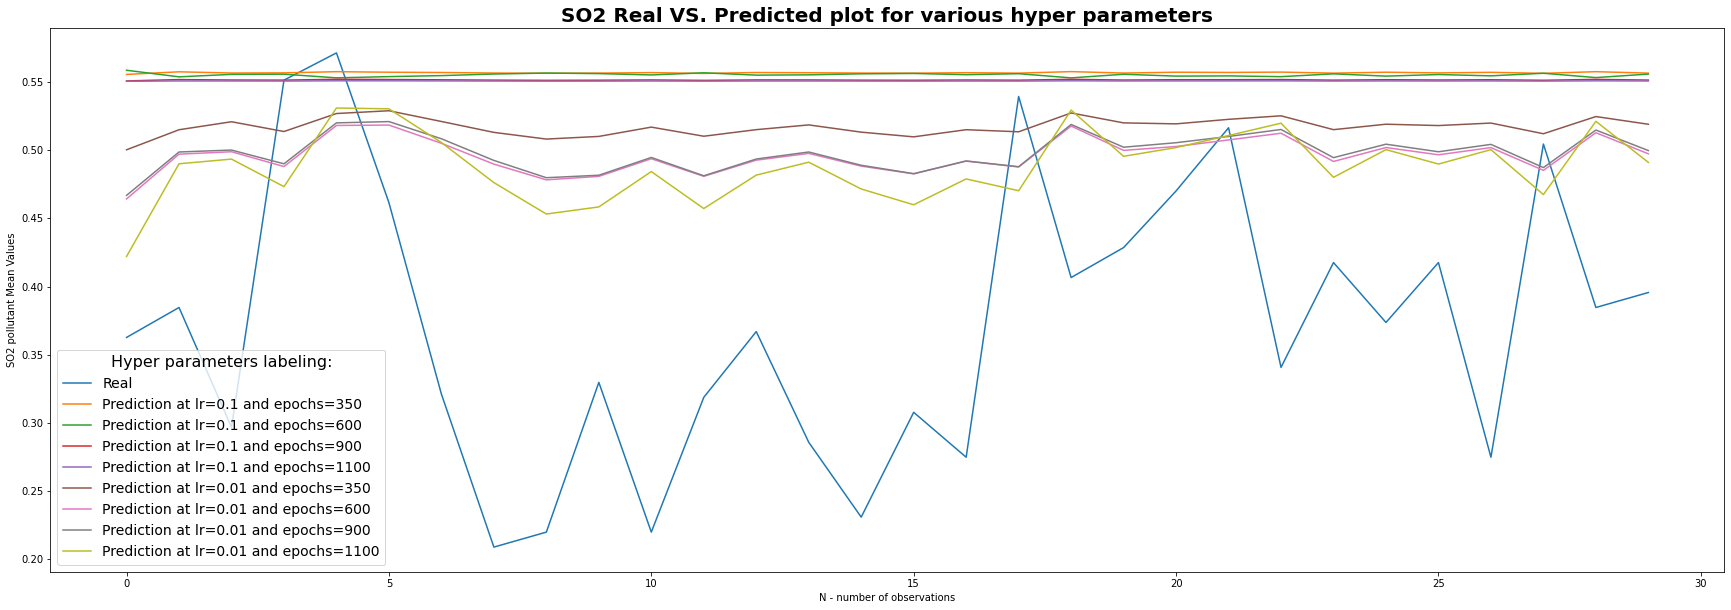

In [ ]:
# SO2 predictions for various SO2mbinations of hyperparams and their SO2mbined plots

SO2_Y_testPrediction1 = SO2_lstm1.predict(SO2_Xtest)
SO2_Y_testPrediction2 = SO2_lstm2.predict(SO2_Xtest)
SO2_Y_testPrediction3 = SO2_lstm3.predict(SO2_Xtest)
SO2_Y_testPrediction4 = SO2_lstm4.predict(SO2_Xtest)
SO2_Y_testPrediction5 = SO2_lstm5.predict(SO2_Xtest)
SO2_Y_testPrediction6 = SO2_lstm6.predict(SO2_Xtest)
SO2_Y_testPrediction7 = SO2_lstm7.predict(SO2_Xtest)
SO2_Y_testPrediction8 = SO2_lstm8.predict(SO2_Xtest)

print("SO2 r.m.s.e. for lr=0.1 epoch=350 =>" + str(calc_err_rmse(SO2_Ytest, SO2_Y_testPrediction1)))
print("SO2 r.m.s.e. for lr=0.1 epoch=600 =>" + str(calc_err_rmse(SO2_Ytest, SO2_Y_testPrediction2)))
print("SO2 r.m.s.e. for lr=0.1 epoch=900 =>" + str(calc_err_rmse(SO2_Ytest, SO2_Y_testPrediction3)))
print("SO2 r.m.s.e. for lr=0.1 epoch=1100 =>" + str(calc_err_rmse(SO2_Ytest, SO2_Y_testPrediction4)))
print("SO2 r.m.s.e. for lr=0.01 epoch=350 =>" + str(calc_err_rmse(SO2_Ytest, SO2_Y_testPrediction5)))
print("SO2 r.m.s.e. for lr=0.01 epoch=600 =>" + str(calc_err_rmse(SO2_Ytest, SO2_Y_testPrediction6)))
print("SO2 r.m.s.e. for lr=0.01 epoch=900 =>" + str(calc_err_rmse(SO2_Ytest, SO2_Y_testPrediction7)))
print("SO2 r.m.s.e. for lr=0.01 epoch=1100 =>" + str(calc_err_rmse(SO2_Ytest, SO2_Y_testPrediction8)))

print("SO2 m.a.p.e. for lr=0.1 epoch=350 =>" + str(calc_err_mape(SO2_Ytest, SO2_Y_testPrediction1)))
print("SO2 m.a.p.e. for lr=0.1 epoch=600 =>" + str(calc_err_mape(SO2_Ytest, SO2_Y_testPrediction2)))
print("SO2 m.a.p.e. for lr=0.1 epoch=900 =>" + str(calc_err_mape(SO2_Ytest, SO2_Y_testPrediction3)))
print("SO2 m.a.p.e. for lr=0.1 epoch=1100 =>" + str(calc_err_mape(SO2_Ytest, SO2_Y_testPrediction4)))
print("SO2 m.a.p.e. for lr=0.01 epoch=350 =>" + str(calc_err_mape(SO2_Ytest, SO2_Y_testPrediction5)))
print("SO2 m.a.p.e. for lr=0.01 epoch=600 =>" + str(calc_err_mape(SO2_Ytest, SO2_Y_testPrediction6)))
print("SO2 m.a.p.e. for lr=0.01 epoch=900 =>" + str(calc_err_mape(SO2_Ytest, SO2_Y_testPrediction7)))
print("SO2 m.a.p.e. for lr=0.01 epoch=1100 =>" + str(calc_err_mape(SO2_Ytest, SO2_Y_testPrediction8)))



plt.figure(figsize=(30, 10))
plt.plot(SO2_Ytest, label='Real')
plt.plot(SO2_Y_testPrediction1, label='Prediction at lr=0.1 and epochs=350')
plt.plot(SO2_Y_testPrediction2, label='Prediction at lr=0.1 and epochs=600')
plt.plot(SO2_Y_testPrediction3, label='Prediction at lr=0.1 and epochs=900')
plt.plot(SO2_Y_testPrediction4, label='Prediction at lr=0.1 and epochs=1100')
plt.plot(SO2_Y_testPrediction5, label='Prediction at lr=0.01 and epochs=350')
plt.plot(SO2_Y_testPrediction6, label='Prediction at lr=0.01 and epochs=600')
plt.plot(SO2_Y_testPrediction7, label='Prediction at lr=0.01 and epochs=900')
plt.plot(SO2_Y_testPrediction8, label='Prediction at lr=0.01 and epochs=1100')
plt.xlabel('N - number of observations')
plt.ylabel('SO2 pollutant Mean Values')
plt.title('SO2 Real VS. Predicted plot for various hyper parameters', fontweight='bold', size=20)
plt.legend(title="Hyper parameters labeling:", fontsize=14, title_fontsize=16)
plt.show()